# Exercise 2

### Suppose that a planet follows an elliptical orbit, which can be represented in a Cartesian coordinate system by the equation of the form

### $$\alpha_{1} y^{2} + \alpha_{2} x y + \alpha_{3} x + \alpha_{4} y + \alpha_{5} = x^{2}.\ \ \ \ \ \ \ \ \ (1)$$

### Based on the observation of the planet's position:

### $$    \left [
      \begin{array}{c}
       x \\
       y
      \end{array}
    \right ] =
    \left [
      \begin{array}{cccccccccc}
   1.02 & 0.95 & 0.87 & 0.77 & 0.67 & 0.56 & 0.44 & 0.30 & 0.16 & 0.01\\
   0.39 & 0.32 & 0.27 & 0.22 & 0.18 & 0.15 & 0.13 & 0.12 & 0.13 & 0.15
      \end{array}
    \right ],$$
   
###   we want to determine the orbital parameters $\alpha_{i}$, $i=1,2,\cdots, 5$, that solve the linear least squares problem of the form: $\min_{\alpha_{i}} \| b - A\alpha \|_{2}$, where the vector $b \in \mathbb{R}^{10}$, $\alpha = [\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5]^{T}\in \mathbb{R}^{5}$ and the matrix $A \in \mathbb{R}^{10\times 5}$ can be obtained easily when we substitute the aboe data to the  equation (1). 

---


## Part 0

Import necessary libraries


In [55]:
import numpy as np
import matplotlib.pyplot as plt

---

## Part 1

### Find the solution of the problem by solving the associated normal equations via Cholesky factorization.

### Part 1.1 

Prepare data vector $x$, $y$ and store them into 1D arrays: `data_x`, `data_y`.

In [68]:
'''
Hint:
    data_x = ?
    data_y = ?
'''

### BEGIN SOLUTION
data_x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
data_y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])
### END SOLUTION

Check your `data_x` and `data_y`.

In [122]:
print('x =', data_x)
print('y =', data_y)
### BEGIN HIDDEN TESTS
assert np.mean(data_x - np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])) < 1e-7
assert np.mean(data_y - np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])) < 1e-7
### END HIDDEN TESTS

x = [1.02 0.95 0.87 0.77 0.67 0.56 0.44 0.3  0.16 0.01]
y = [0.39 0.32 0.27 0.22 0.18 0.15 0.13 0.12 0.13 0.15]


### Part 1.2

Construct the matrix $A$ and the vector $b$ with the data $x,y$ and the equation (1). 

In [70]:
def construct_A_and_b(x, y):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y

    Returns:
        A : 2D np.array
        b : 1D np.array
    '''

    ### BEGIN SOLUTION
    assert len(x) == len(y)
    b = np.array(x**2)
    A = np.column_stack((
        y**2,
        x*y,
        x,
        y,
        np.ones(len(x)),
    ))
    return A, b
    ### END SOLUTION

Check your $A$ and $b$.

In [71]:
A, b = construct_A_and_b(data_x, data_y)
print('A:\n', A)
print('b:\n', b)

A:
 [[0.1521 0.3978 1.02   0.39   1.    ]
 [0.1024 0.304  0.95   0.32   1.    ]
 [0.0729 0.2349 0.87   0.27   1.    ]
 [0.0484 0.1694 0.77   0.22   1.    ]
 [0.0324 0.1206 0.67   0.18   1.    ]
 [0.0225 0.084  0.56   0.15   1.    ]
 [0.0169 0.0572 0.44   0.13   1.    ]
 [0.0144 0.036  0.3    0.12   1.    ]
 [0.0169 0.0208 0.16   0.13   1.    ]
 [0.0225 0.0015 0.01   0.15   1.    ]]
b:
 [1.0404e+00 9.0250e-01 7.5690e-01 5.9290e-01 4.4890e-01 3.1360e-01
 1.9360e-01 9.0000e-02 2.5600e-02 1.0000e-04]


### Part 1.3

As the [lecture](https://ceiba.ntu.edu.tw/course/7a770d/content/cmath2019_note4_linear_system_cholesky.pdf) noted, to solve the noraml eqaution via Cholesky factorization we need additional __Forward substitution__ and __Backward substituion__ besides the __Cholesky factorization__. Please implement and check these three algorithms at below.

__Algorithm 1__: Implement forward substitution to solve $$Lx=b,$$ where $L$ is a lower triangular matrix and $b$ is a column vector.

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [72]:
def forward_substitution(L, b):
    '''
    Arguments:
        L : 2D lower triangular np.array
        b : 1D np.array

    Return:
        x : solution to Lx = b
    '''

    ### BEGIN SOLUTION
    assert len(L.shape) == 2
    m, n = L.shape
    assert m == n
    assert len(b) == n

    x = np.zeros(n)
    for i in range(n):
        r = sum([L[i, j] * x[j] for j in range(i)])
        x[i] = (b[i] - r) / L[i, i]
    return x
    ### END SOLUTION

Check your function.

In [73]:
L = np.array([
    [1, 0, 0, 0],
    [2, 1, 0, 0],
    [4, 5, 6, 0],
    [1, 2, 3, 4]
])
x = np.array([11, 22, 33, 24])
print('L:\n', L)
print('x:\n', x)
print('My answer:\n', forward_substitution(L, L @ x))

L:
 [[1 0 0 0]
 [2 1 0 0]
 [4 5 6 0]
 [1 2 3 4]]
x:
 [11 22 33 24]
My answer:
 [11. 22. 33. 24.]


__Algorithm 2__: Implement backward substitution to solve $$Rx=b,$$ where $R$ is an upper triangular matrix and $b$ is a column vector.

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [118]:
def backward_substitution(R, b):
    '''
    Arguments:
        R : 2D upper triangular np.array
        b : 1D np.array

    Return:
        x : solution to Rx = b
    '''

    ### BEGIN SOLUTION
    assert len(R.shape) == 2
    m, n = R.shape
    assert m == n
    assert len(b) == n

    x = np.zeros(n)
    for i in reversed(range(n)):
        r = sum([R[i, j] * x[j] for j in range(i, n)])
        x[i] = (b[i] - r) / R[i, i]
    return x
    ### END SOLUTION

Check your function.

In [119]:
R = np.array([
    [1, 2, 3],
    [0, 4, 5],
    [0, 0, 9]
])
x = np.array([11, 22, 33])
print('R:\n', R)
print('x:\n', x)
print('My answer:\n', backward_substitution(R, R @ x))

R:
 [[1 2 3]
 [0 4 5]
 [0 0 9]]
x:
 [11 22 33]
My answer:
 [11. 22. 33.]


__Algorithm 3__: Implement Cholesky decompostion to decompose a nonsingualr [PSD](https://www.wikiwand.com/en/Definiteness_of_a_matrix) matrix $A$ into $$A=R^T R,$$ where $R$ is an upper triangular matrix.

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [121]:
def cholesky_decomposition(A):
    '''
    Arguments:
        A : 2D np.array

    Return:
        R : 2D np.array, A = R^T R
    '''

    ### BEGIN SOLUTION
    assert len(A.shape) == 2
    m, n = A.shape
    assert m == n

    R = np.zeros((n, n))
    for i in range(n):
        R[i, i] = np.sqrt(A[i, i] - sum(R[k, i]**2 for k in range(i)))
        for j in range(i+1, n):
            R[i, j] = (A[i, j] - sum(R[k, i]*R[k, j] for k in range(j))) / R[i, i]
    return R
    ### END SOLUTION

Check your function.

In [77]:
# Construct a PSD matrix A
_A = np.array([
    [1, 3, 2, 4],
    [4, 2, 1, 7],
    [2, 5, 9, 0],
    [3, 5, 8, 2]
])
A = _A.T @ _A

# Do Cholesky decomposition
R = cholesky_decomposition(A)
print('A:\n', A)
print('R:\n', R)
print('A = R.T @ R:\n', R.T @ R)

A:
 [[ 30  36  48  38]
 [ 36  63  93  36]
 [ 48  93 150  31]
 [ 38  36  31  69]]
R:
 [[ 5.47722558  6.57267069  8.76356092  6.93781906]
 [ 0.          4.44971909  7.95555838 -2.15743956]
 [ 0.          0.          3.14787085 -4.01425733]
 [ 0.          0.          0.          0.31282475]]
A = R.T @ R:
 [[ 30.  36.  48.  38.]
 [ 36.  63.  93.  36.]
 [ 48.  93. 150.  31.]
 [ 38.  36.  31.  69.]]


### Part 1.4

Implement the function `solve_alpha` to find $\alpha$ from the associated the normal equation.

In [78]:
def solve_alpha(x, y):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y

    Returns:
        alpha : 1D np.array

    Hints:
        1. Find matrix A, vector b
        2. Find the associated normal equation
        3. Do Cholesky decomposition
        4. Solve the equation with forward/backward substition
    '''

    ### BEGIN SOLUTION
    A, b = construct_A_and_b(x, y)
    R = cholesky_decomposition(A.T @ A)
    L = R.T
    w = forward_substitution(L, A.T @ b)
    alpha = backward_substitution(R, w)
    return alpha
    ### END SOLUTION

Solve $\alpha$ !

In [123]:
alpha = solve_alpha(data_x, data_y)
print('alpha:\n', alpha)
### BEGIN HIDDEN TESTS
assert np.mean(alpha - np.array([-2.63562548,  0.14364618,  0.55144696,  3.22294034, -0.43289427])) < 1e-7
### END HIDDEN TESTS

alpha:
 [-2.63562548  0.14364618  0.55144696  3.22294034 -0.43289427]


---

## Part 2

### Perturb the input data slightly by adding to each coordinate of each data point a uniformly distributed random number, and solve the least square problem as before with the perturbed data. 

### Compare the new values for the parameters with those previously computed. What effect does this difference have on the plot of the orbit ?

### Part 2.1

In order to plot the orbit, we need to transform the equation (1) into a graph $z = f(x, y, \alpha)$ and then plot the contour at $z = 0$ by the tool `plt.contour`.

In [82]:
def ellipse(x, y, alpha):
    '''
    Arguments:
        x : 1D np.array, data x
        y : 1D np.array, data y
        alpha : 1D np.array, the coefficients

    Returns:
        z : 1D np.array, z=f(x, y, alpha) from equation (1)
    '''
    ### BEGIN SOLUTION
    z = 0
    z += alpha[0] * y**2
    z += alpha[1] * x * y
    z += alpha[2] * x
    z += alpha[3] * y
    z += alpha[4] * 1
    z += -x**2
    return z
    ### END SOLUTION

Plot the orbit.

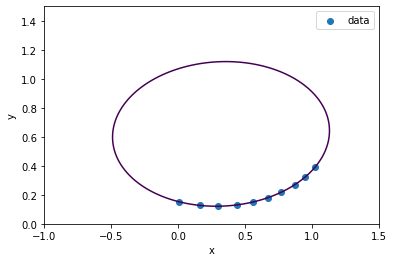

In [116]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Prepare mesh data points (X,Y) to plot the orbit
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)
# Plot the level curve at z = 0 only
plt.contour(X, Y, ellipse(X, Y, alpha), [0])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Part 2.2

Now perturb the original data with some slight, uniformly random noise and follow the steps as before to find new `perturbed_x`, `perturbed_y`, `perturbed_alpha`.

In [112]:
'''
Hint:
    perturbed_x = ?
    perturbed_y = ?
    perturbed_alpha = ?
'''

### BEGIN SOLUTION
perturbed_x = data_x + np.random.rand(len(data_x)) * 0.005
perturbed_y = data_y + np.random.rand(len(data_y)) * 0.005
perturbed_alpha = solve_alpha(perturbed_x, perturbed_y)
### END SOLUTION

Overlay the new perturbed orbit on the plot.

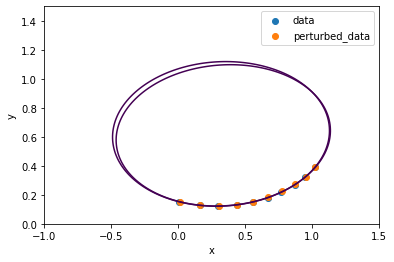

In [117]:
# Plot the exact data points (x,y)
plt.scatter(data_x, data_y, label='data')

# Plot the perturbed data points 
plt.scatter(perturbed_x, perturbed_y, label='perturbed_data')

# Prepare mesh data points (X,Y) to plot the orbits
X, Y = np.meshgrid(
    np.linspace(-1, 1.5, 100),
    np.linspace(0, 1.5, 100)
)

# Plot the level curve at z = 0 
plt.contour(X, Y, ellipse(X, Y, alpha), [0])

# Plot the level curve at z = 0 after perturbed
plt.contour(X, Y, ellipse(X, Y, perturbed_alpha), [0])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Part 2.3

Try some different perturbations and compare the orbits before and after your perturbation. What's your observation? 

> Please write down your answer here.